In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
import yfinance as yf
print(yf.__version__)

0.2.48


[*********************100%***********************]  1 of 1 completed


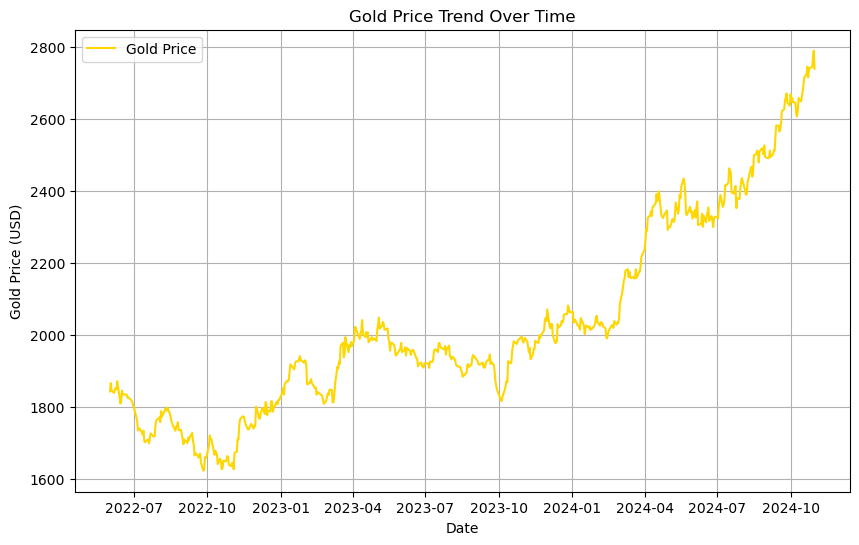

In [3]:
# Use the correct ticker symbol for gold, for example, 'GC=F' (Gold Futures)
gold_ticker = 'GC=F'
# Fetch historical data
gold_data = yf.download('GC=F', start='2022-06-01', end='2024-11-1')
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(gold_data['Close'], label='Gold Price', color='gold')
plt.title('Gold Price Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Gold Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

In [4]:
gold_data.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,GC=F,GC=F,GC=F,GC=F,GC=F,GC=F
Date,,,,,,
2022-06-01 00:00:00+00:00,1843.300049,1843.300049,1847.900024,1825.300049,1831.000000,1623
2022-06-02 00:00:00+00:00,1866.500000,1866.500000,1868.699951,1842.099976,1845.400024,551
2022-06-03 00:00:00+00:00,1845.400024,1845.400024,1871.800049,1845.400024,1867.599976,53
2022-06-06 00:00:00+00:00,1839.199951,1839.199951,1854.099976,1839.199951,1849.000000,142
2022-06-07 00:00:00+00:00,1847.500000,1847.500000,1851.599976,1835.000000,1836.900024,1168


In [5]:
gold_data.shape

(609, 6)

<Axes: xlabel='Date'>

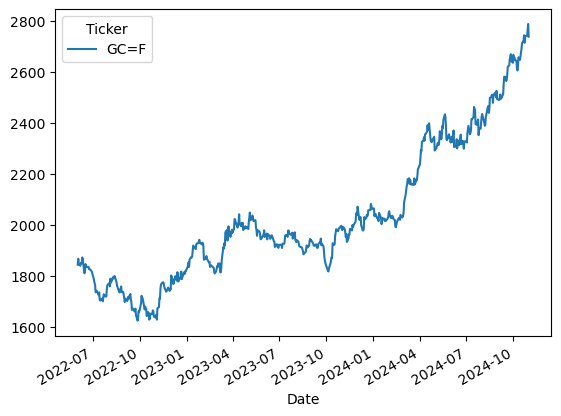

In [6]:
gold_data['Close'].plot()

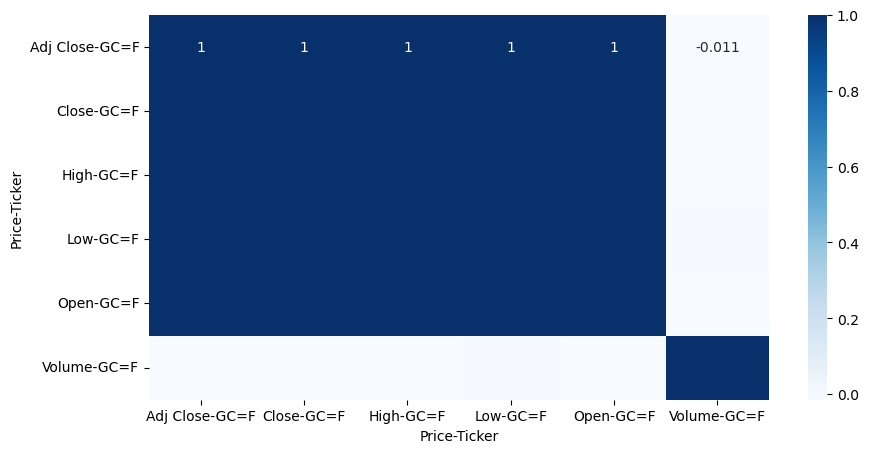

In [7]:
# Assuming 'data' is your DataFrame
# Drop non-numeric columns
numeric_data = gold_data.select_dtypes(include=['number'])

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 5))
sns.heatmap(numeric_data.corr(), cmap='Blues', annot=True)
plt.show()


In [8]:
duplicates = gold_data[gold_data.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [(Adj Close, GC=F), (Close, GC=F), (High, GC=F), (Low, GC=F), (Open, GC=F), (Volume, GC=F)]
Index: []


In [9]:
returns = gold_data.pct_change()
correlation_matrix = returns.corr()

## using returns (percentage change) instead of raw prices for correlation analysis

In [10]:
returns.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,GC=F,GC=F,GC=F,GC=F,GC=F,GC=F
Date,,,,,,
2022-06-01 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2022-06-02 00:00:00+00:00,0.012586,0.012586,0.011256,0.009204,0.007865,-0.660505
2022-06-03 00:00:00+00:00,-0.011305,-0.011305,0.001659,0.001791,0.012030,-0.903811
2022-06-06 00:00:00+00:00,-0.003360,-0.003360,-0.009456,-0.003360,-0.009959,1.679245
2022-06-07 00:00:00+00:00,0.004513,0.004513,-0.001348,-0.002284,-0.006544,7.225352


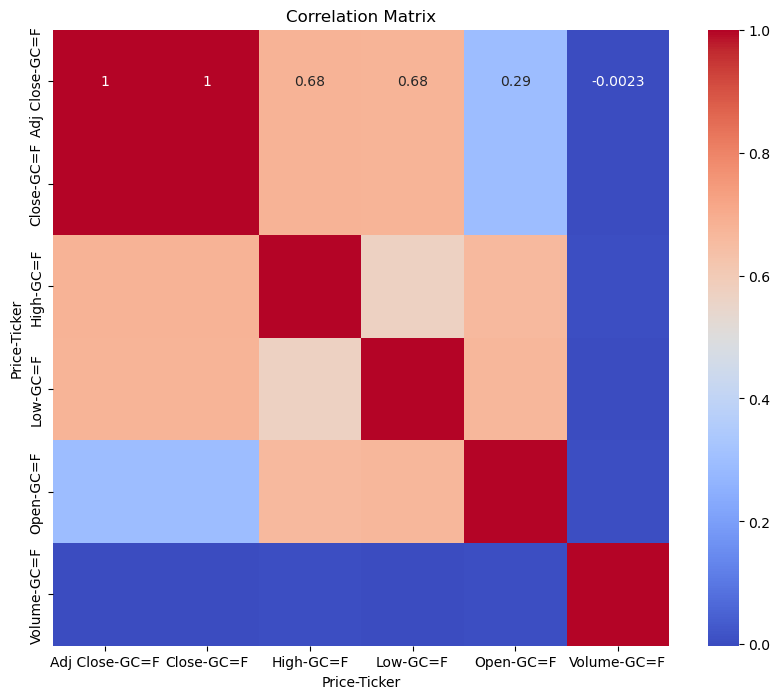

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

In [12]:
# Assuming 'data' is your DataFrame and 'Close' is your target
X = gold_data[['Open', 'High', 'Low', 'Volume']]  # Adjust as needed
y = gold_data['Close']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
print("Training data shape:", X_train.shape, y_train.shape)
print("Testing data shape:", X_test.shape, y_test.shape)

Training data shape: (487, 4) (487, 1)
Testing data shape: (122, 4) (122, 1)


In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [16]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [17]:
y_pred = model.predict(X_test)

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

Mean Squared Error: 30.724012592997564
R² Score: 0.99959085160806


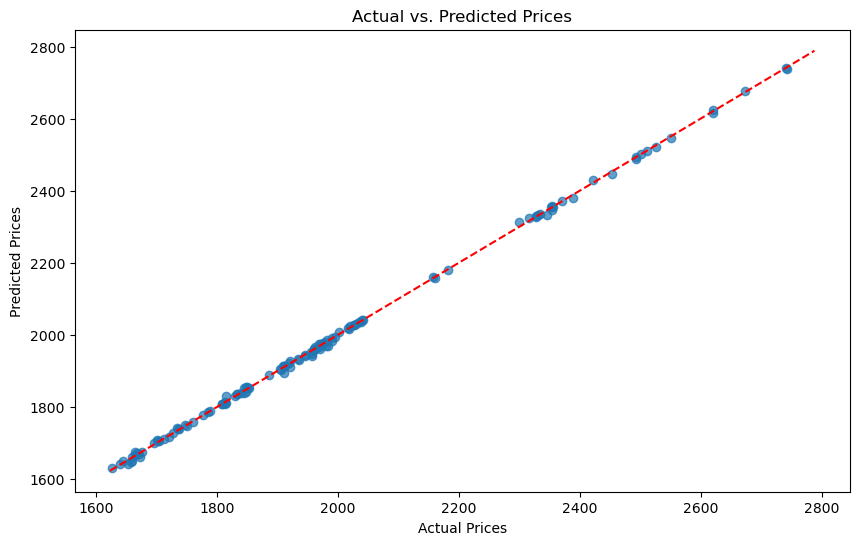

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Reference line
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices')
plt.show()

In [23]:
print("Shape of y_test:", y_test.shape)
print("Shape of y_pred:", y_pred.shape)

Shape of y_test: (122, 1)
Shape of y_pred: (122, 1)


In [24]:
import pandas as pd

# Assuming y_test and y_pred are defined and are either DataFrames, Series, or NumPy arrays
# Print shapes
print("Shape of y_test:", y_test.shape)
print("Shape of y_pred:", y_pred.shape)

# Flatten if necessary
if isinstance(y_test, pd.DataFrame) or isinstance(y_test, pd.Series):
    y_test_flat = y_test.values.flatten()  # Flattening DataFrame/Series to 1D array
else:
    y_test_flat = y_test.flatten()  # If y_test is already a NumPy array

if isinstance(y_pred, pd.DataFrame) or isinstance(y_pred, pd.Series):
    y_pred_flat = y_pred.values.flatten()  # Flattening DataFrame/Series to 1D array
else:
    y_pred_flat = y_pred.flatten()  # If y_pred is already a NumPy array

# Create DataFrame to hold actual vs predicted prices
results = pd.DataFrame({'Actual Price': y_test_flat, 'Predicted Price': y_pred_flat})

# Reset index
results.reset_index(drop=True, inplace=True)

# Display results
print(results.head())

Shape of y_test: (122, 1)
Shape of y_pred: (122, 1)
   Actual Price  Predicted Price
0   1970.500000      1961.093459
1   1945.500000      1940.971893
2   2354.800049      2358.412549
3   2493.399902      2487.876903
4   1760.800049      1757.693298


In [25]:
# Define thresholds for decision-making
buy_threshold = 0.001  # Buy if predicted price is 5% higher
sell_threshold = -0.001  # Sell if predicted price is 5% lower

def decision(row):
    if row['Predicted Price'] > row['Actual Price'] * (1 + buy_threshold):
        return 'Buy'
    elif row['Predicted Price'] < row['Actual Price'] * (1 + sell_threshold):
        return 'Sell'
    else:
        return 'Hold'

# Apply the decision function to each row
results['Decision'] = results.apply(decision, axis=1)

# Display the results with decisions
print(results[['Actual Price', 'Predicted Price', 'Decision']].head())


   Actual Price  Predicted Price Decision
0   1970.500000      1961.093459     Sell
1   1945.500000      1940.971893     Sell
2   2354.800049      2358.412549      Buy
3   2493.399902      2487.876903     Sell
4   1760.800049      1757.693298     Sell


In [26]:
results.head()

,Actual Price,Predicted Price,Decision
0,1970.500000,1961.093459,Sell
1,1945.500000,1940.971893,Sell
2,2354.800049,2358.412549,Buy
3,2493.399902,2487.876903,Sell
4,1760.800049,1757.693298,Sell


In [27]:
# Save to CSV
results.to_csv('gold_pred.csv', index=False)
print("\nSaved to 'gold_pred.csv'")


Saved to 'gold_pred.csv'


In [28]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA


In [29]:
# Download historical gold price data (using GLD ETF)
gold_data = yf.download('GC=F', start='2022-06-01', end='2024-11-1')


[*********************100%***********************]  1 of 1 completed


In [30]:
# Prepare the data for Prophet
gold_prices = gold_data['Close'].reset_index()
gold_prices.columns = ['ds', 'y']  # Rename columns for Prophet

# Remove timezone information from the 'ds' column
gold_prices['ds'] = gold_prices['ds'].dt.tz_localize(None)

pip install prophet

In [33]:
from prophet import Prophet 

In [34]:
# Split the data into train and test sets
train_size = int(len(gold_prices) * 0.8)
train = gold_prices[:train_size]
test = gold_prices[train_size:]


In [35]:
# Create and fit the Prophet model on training data
model = Prophet()
model.fit(train)


04:42:51 - cmdstanpy - INFO - Chain [1] start processing
04:42:51 - cmdstanpy - INFO - Chain [1] done processing


In [36]:
# Create a DataFrame for future dates (test set)
future = model.make_future_dataframe(periods=len(test))
forecast = model.predict(future)


In [37]:
# Filter predictions to get values for the test period
predictions = forecast[forecast['ds'].isin(test['ds'])]


In [38]:
# Merge predictions with the actual test values to align the dates
merged = test.merge(predictions[['ds', 'yhat']], on='ds', how='inner')

# Check if the merge was successful
print(merged.head())


          ds            y         yhat
0 2024-05-09  2332.100098  2312.153057
1 2024-05-10  2367.300049  2316.150420
2 2024-05-13  2336.100098  2319.596563
3 2024-05-14  2353.399902  2322.725209
4 2024-05-15  2388.699951  2324.525235


In [39]:
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error

# Calculate MAPE and MAE
mape = mean_absolute_percentage_error(merged['y'], merged['yhat'])
mae = mean_absolute_error(merged['y'], merged['yhat'])

print(f'MAPE: {mape:.2%}')
print(f'MAE: {mae:.2f}')


MAPE: 2.71%
MAE: 64.85


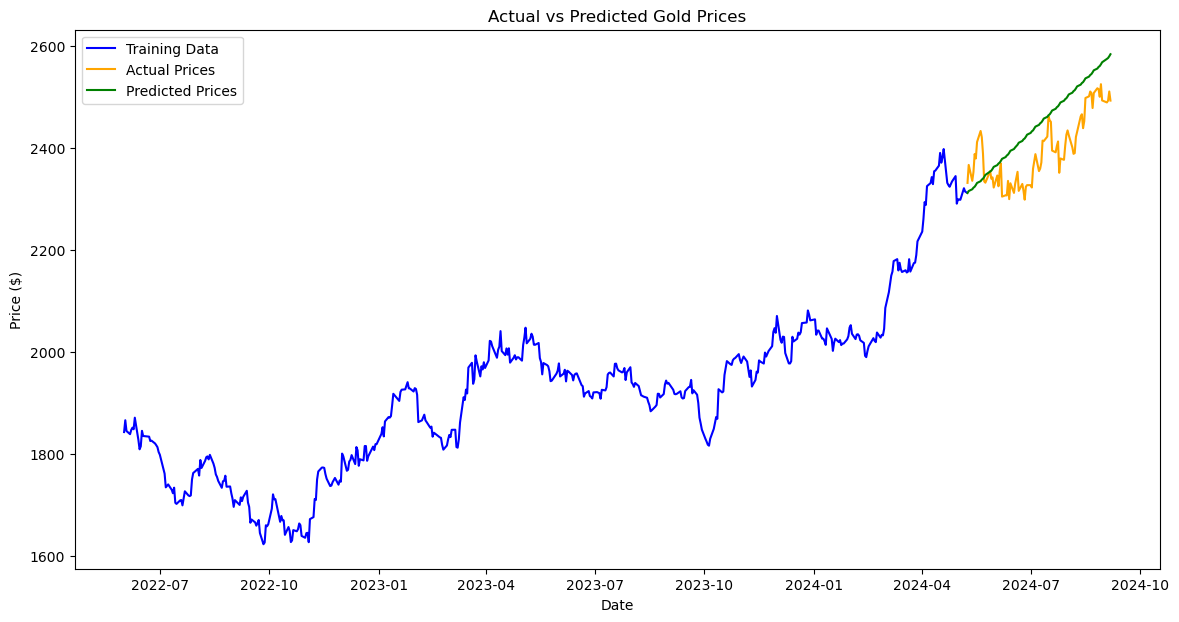

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(train['ds'], train['y'], label='Training Data', color='blue')
plt.plot(merged['ds'], merged['y'], label='Actual Prices', color='orange')
plt.plot(merged['ds'], merged['yhat'], label='Predicted Prices', color='green')
plt.legend()
plt.title('Actual vs Predicted Gold Prices')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.show()


In [41]:
# Assuming 'merged' DataFrame contains actual prices in 'y' and predicted prices in 'yhat'
current_price = merged['y'].iloc[-1]  # Get the latest actual price
predicted_price = merged['yhat'].iloc[-1]  # Get the latest predicted price

# Print Actual vs Predicted Prices
comparison_df = merged[['ds', 'y', 'yhat']].tail(10)  # Show the last 10 entries for better readability
print("Actual vs Predicted Prices:")
print(comparison_df)

# Generate recommendation based on the prices
if predicted_price < current_price:
    recommendation = "Recommendation: Consider selling, as the predicted price is lower than the current price."
else:
    recommendation = "Recommendation: Consider buying, as the predicted price is higher than the current price."

print(f"\nCurrent Price: ${current_price:.2f}")
print(f"Predicted Price: ${predicted_price:.2f}")
print(recommendation)


Actual vs Predicted Prices:
           ds            y         yhat
73 2024-08-23  2508.399902  2552.900213
74 2024-08-26  2517.699951  2556.346355
75 2024-08-27  2516.000000  2559.475002
76 2024-08-28  2501.000000  2561.275027
77 2024-08-29  2525.699951  2564.686169
78 2024-08-30  2493.800049  2568.683532
79 2024-09-03  2489.899902  2575.258321
80 2024-09-04  2493.399902  2577.058347
81 2024-09-05  2511.399902  2580.469488
82 2024-09-06  2493.500000  2584.466852

Current Price: $2493.50
Predicted Price: $2584.47
Recommendation: Consider buying, as the predicted price is higher than the current price.


In [42]:
import yfinance as yf
import datetime

# Fetch news for ANZ (ticker symbol for Australia and New Zealand Banking Group)
anz_news = yf.Ticker("GC=F").news

# Display the news with formatted dates
for article in anz_news:
    title = article['title']
    link = article['link']
    publish_time = datetime.datetime.fromtimestamp(article['providerPublishTime'])
    formatted_date = publish_time.strftime("%Y-%m-%d")
    
    print(f"Title: {title}")
    print(f"Link: {link}")
    print(f"Published at: {formatted_date}")
    print()


Title: Gold Climbs Ahead of US Jobs Data as Investors Focus on Election
Link: https://finance.yahoo.com/news/gold-steadies-tumbling-record-rate-233747804.html
Published at: 2024-11-01

Title: Limited Headwinds for the Dollar After Advance GDP Misses Expectations
Link: https://finance.yahoo.com/news/limited-headwinds-dollar-advance-gdp-103813018.html
Published at: 2024-11-01

Title: Stocks open mixed as Big Tech earnings rollout continues
Link: https://finance.yahoo.com/video/stocks-open-mixed-big-tech-134340895.html
Published at: 2024-10-31

Title: Gold touches new high, silver surges as metals 'momentum' builds
Link: https://finance.yahoo.com/news/gold-touches-new-high-silver-surges-as-metals-momentum-builds-173452782.html
Published at: 2024-10-30

Title: Gold Climbs to Fresh Record With Focus on US Election and Data
Link: https://finance.yahoo.com/news/gold-steadies-focus-key-us-003409332.html
Published at: 2024-10-30

Title: Analysis of Platinum Price Surge: What’s Next for Platinum